# `Student: Andres F. Diez`

### `README`

Project Goal: The Goal of the assignment is to demonstrate that best practices for open scientific research are followed, and that the project is fully reproducible by others. My project consists of an open source dataset from the UN. Here I compare different attributes by continent to track how countries are imporving on these metrics. The data is colllected every five years, here we analyzed the attributes in the description below for the years 2010, 2015 and 2020.

Links to relevant documentation:

The data was extracted from the UN database Website at http://data.un.org/. More details on the dataset availabe at http://data.un.org/Host.aspx?Content=About. The dataset is opensource and requires no license.

Data type and description of attributes:

InfantMortality: Infant mortality for both sexes (per 1,000 live births)  
LifeExpectancy: Life expectancy at birth for both sexes (years)  
LifeExpectancyFemales: Life expectancy at birth for females (years)  
LifeExpectancyMales: Life expectancy at birth for males (years)  
TotalFertilityRate: Total fertility rate (children per women)  
MaternalMortalityRatio: Maternal mortality ratio (deaths per 100,000 population)  
PopulationAnnualRate: Population annual rate of increase (percent) 

There are no known issues with the dataset.

In [1]:
# import required libraries
#
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset into dataframe
#
df = pd.read_csv('UNdataset.csv')

In [3]:
# visualize dataframe data
#
df.head(6)

,Country,Region,Continent,Year,InfantMortality,LifeExpectancy,LifeExpectancyFemales,LifeExpectancyMales,TotalFertilityRate,MaternalMortalityRatio,PopulationAnnualRate
0,Afghanistan,Southern Asia,Asia,2010,72.2,59.6,61.0,58.3,6.5,954.0,2.6
1,Afghanistan,Southern Asia,Asia,2015,60.1,62.3,63.8,60.9,5.4,701.0,3.3
2,Afghanistan,Southern Asia,Asia,2020,51.7,64.3,65.8,62.9,4.6,NaN,2.5
3,Albania,Southern Europe,Europe,2010,16.8,75.6,78.5,73.2,1.6,21.0,-0.9
4,Albania,Southern Europe,Europe,2015,9.2,77.5,80.0,75.2,1.7,15.0,-0.4
5,Albania,Southern Europe,Europe,2020,8.0,78.4,80.1,76.7,1.6,NaN,-0.1


In [4]:
# dataframe summary
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 591 non-null    object 
 1   Region                  591 non-null    object 
 2   Continent               591 non-null    object 
 3   Year                    591 non-null    int64  
 4   InfantMortality         591 non-null    float64
 5   LifeExpectancy          591 non-null    float64
 6   LifeExpectancyFemales   591 non-null    float64
 7   LifeExpectancyMales     591 non-null    float64
 8   TotalFertilityRate      591 non-null    float64
 9   MaternalMortalityRatio  370 non-null    float64
 10  PopulationAnnualRate    591 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 50.9+ KB


#### Comment: the dataset consist of 603 entries or records and 9 columns or attributes

In [5]:
# check for null data
# NaN stands for Not A Number and is one of the common ways to represent the missing value in the data
#
df.isnull().sum()

Country                     0
Region                      0
Continent                   0
Year                        0
InfantMortality             0
LifeExpectancy              0
LifeExpectancyFemales       0
LifeExpectancyMales         0
TotalFertilityRate          0
MaternalMortalityRatio    221
PopulationAnnualRate        0
dtype: int64

#### Comment: The MaternalMortalityRatio attribute has 221 missing (NaN) values. However, these records will not be removed from the dataset or edited considering they do not affect the exploratory data analysis (EDA) performed

In [6]:
# check for duplicate data
#
df[df.duplicated()].sum()

Country                   0.0
Region                    0.0
Continent                 0.0
Year                      0.0
InfantMortality           0.0
LifeExpectancy            0.0
LifeExpectancyFemales     0.0
LifeExpectancyMales       0.0
TotalFertilityRate        0.0
MaternalMortalityRatio    0.0
PopulationAnnualRate      0.0
dtype: float64

#### Comment: There is no duplicate data in the dataset

In [7]:
# dataframe descriptive statistics summary
#
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,591.0,2015.000000,4.085941,2010.0,2010.00,2015.0,2020.00,2020.0
InfantMortality,591.0,25.405753,23.531179,1.3,6.80,15.8,41.25,122.1
LifeExpectancy,591.0,70.964467,8.496391,43.1,66.00,73.0,77.30,84.4
LifeExpectancyFemales,591.0,73.439255,8.875979,45.8,67.75,75.9,80.10,87.5
LifeExpectancyMales,591.0,68.538071,8.233251,40.6,63.60,69.9,74.70,81.6
TotalFertilityRate,591.0,2.878511,1.410371,1.1,1.80,2.4,3.80,7.6
MaternalMortalityRatio,370.0,179.567568,256.730542,2.0,15.00,58.0,247.00,1360.0
PopulationAnnualRate,591.0,1.413706,1.480963,-3.4,0.50,1.3,2.30,15.3


In [8]:
# useful list for plotting
#
numeric_attributes = ['Year','InfantMortality','LifeExpectancy','LifeExpectancyFemales','LifeExpectancyMales',
                      'TotalFertilityRate','MaternalMortalityRatio', 'PopulationAnnualRate']

order_by_continent = ['Africa','Asia','Europe','North America','South America','Oceania']

order_by_region = ['Northern Africa','Eastern Africa','Middle Africa','Western Africa','Southern Africa',
                   'Southern Asia','Eastern Asia','Central Asia','Western Asia','South-eastern Asia',
                   'Melanesia', 'Polynesia','Micronesia','Australia and New Zealand','Northern Europe',
                   'Eastern Europe','Western Europe','Southern Europe','South America','Central America',
                   'Northern America','Caribbean']

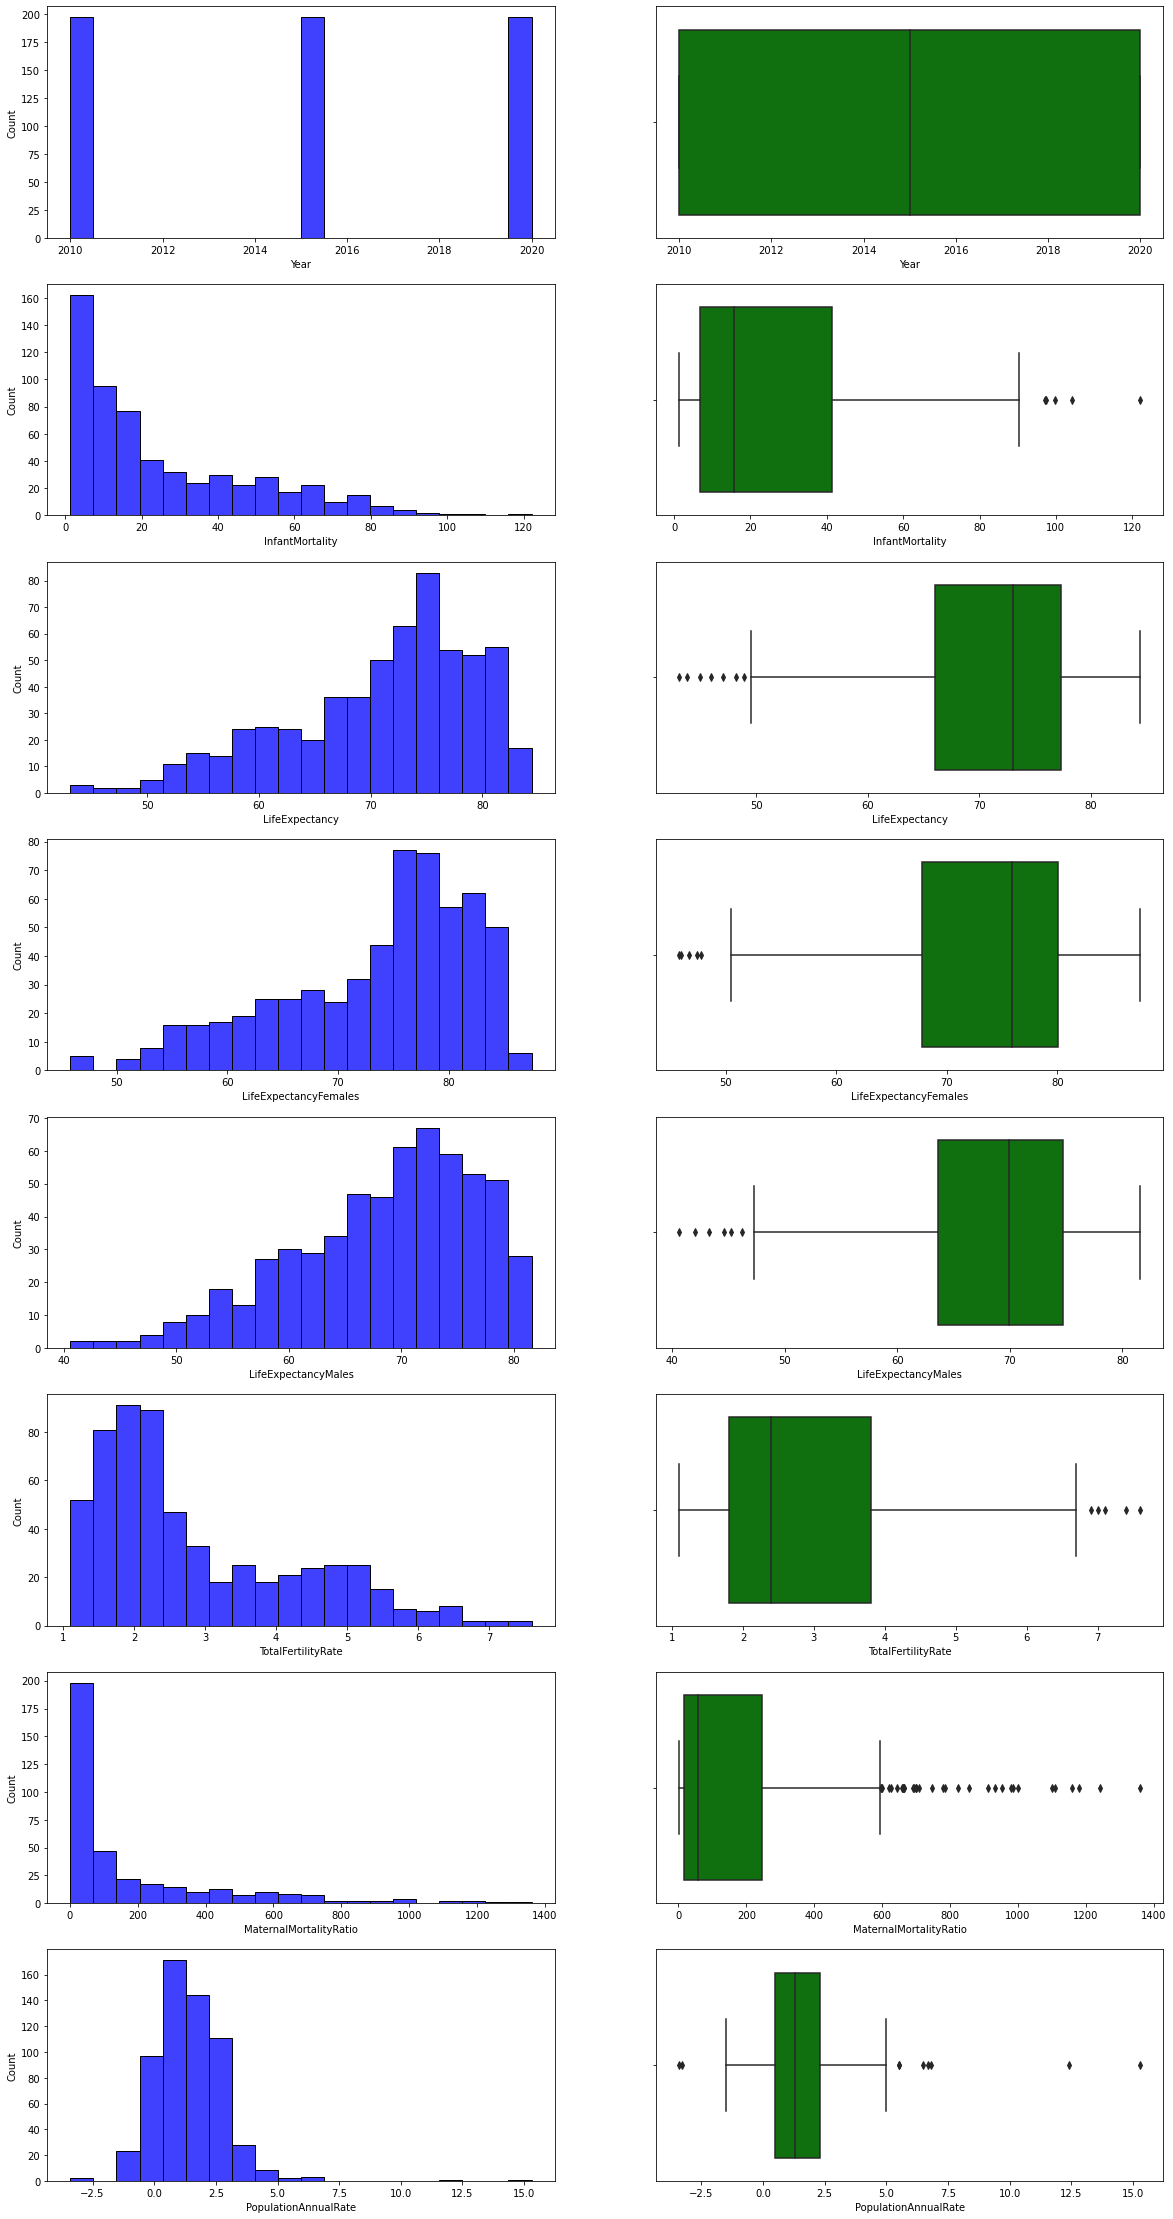

In [9]:
# Figure 1
#
f,axs = plt.subplots(len(numeric_attributes),2,figsize=(20,40))

for i in range(0,len(numeric_attributes)):
    sns.histplot(df[numeric_attributes[i]], bins=20, color='blue', ax=axs[i,0])
    sns.boxplot(x=df[numeric_attributes[i]], color='green', ax=axs[i,1])
plt.savefig('Figure 1-International Data Visual Summary.jpeg')

#### Observations: Figure 1 is a visual summary of the data. The distribution graphs help best illustrate the distribution and trends of the data for a given attribute. Box plots are more of a generalized summary of the data for all countries for each of the 8 attributes. 

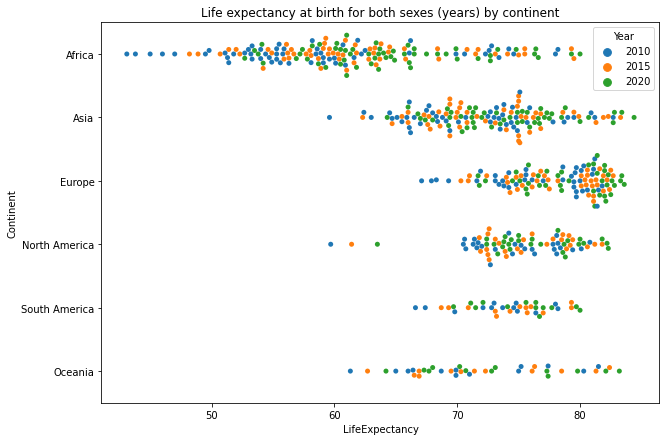

In [10]:
# Figure 2
#
plt.figure(figsize=(10,7))
ax = sns.swarmplot(data=df, x='LifeExpectancy', y='Continent', hue='Year',order=order_by_continent).set_title(
    'Life expectancy at birth for both sexes (years) by continent')
plt.savefig('Figure 2-Life expectancy by continent.jpeg')

#### Observations: Figure 2 is a swarmplot that compares life expectancy by continent, this type of graph illustrates data for all countries in a given continent showing distribution as well as change over time. Here it is clear that Africa has the lowest average life expectancy, although by 2020 the average life expectancy in africa was extended by around 10 years. Africa's gain seems to correlate with the global trend, for  all continents the lowest average data point was higher than both 2010 and 2015's lowest data points. indicating that overall life expectancy is increasing.

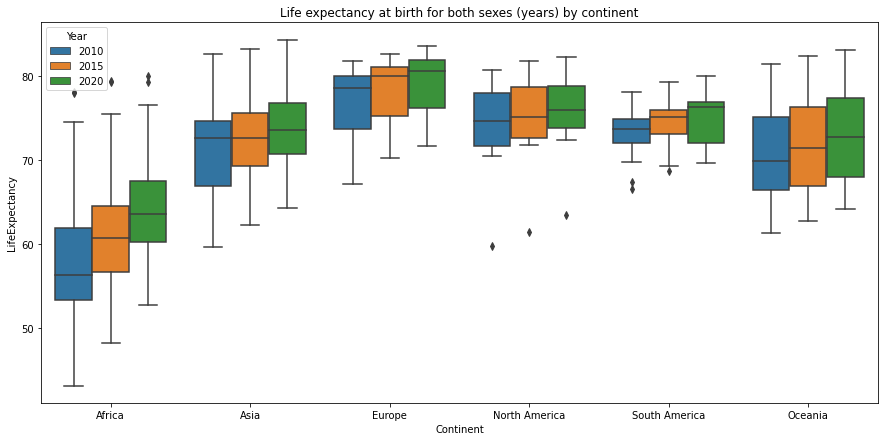

In [11]:
# Figure 3
#
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df, x='Continent', y='LifeExpectancy', hue='Year',order=order_by_continent).set_title(
    'Life expectancy at birth for both sexes (years) by continent')
plt.savefig('Figure 3-Life expectancy by continent.jpeg')

#### Observations: Using the same variables as in Figure 2, Figure 3 also compares life expectancy by continent. Figure 3 is a boxplot that illustrates the mean, minimum and maximum values for life expectancy for all countries in a given continent. Here we can see that the spread of data is much closer than it apeared on Figure 2. We can see that South America apears to have the least amount of deviation from the mean indicating that the life expectancy in the continent is very similar throughout. Overall there has been an upward trend in global life expectancy.

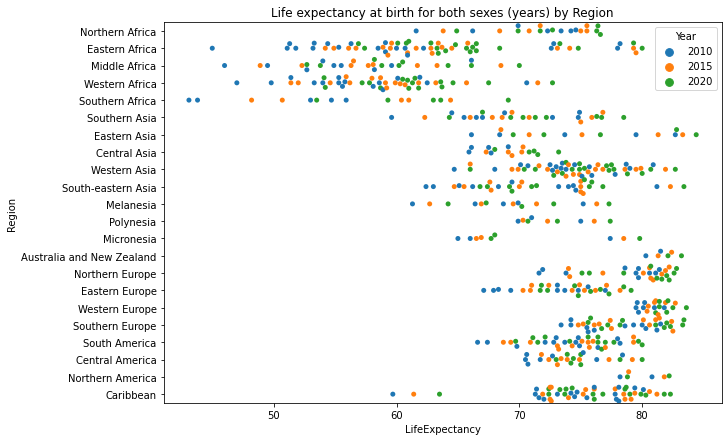

In [12]:
# Figure 4
#
plt.figure(figsize=(10,7))
ax = sns.swarmplot(data=df, x='LifeExpectancy', y='Region', hue='Year',order=order_by_region).set_title(
    'Life expectancy at birth for both sexes (years) by Region')
plt.savefig('Figure 4-Life expectancy by Region.jpeg')

#### Observations: Here we break up the data even more, we are dividing continents into 22 regions. Once again we take a look at  life expectancy, this time by region. Here we can se a more representative distribution of life expectancy, this swarm plot illustrates the disparity between regions in the same continent. Two good examples are Melanesia vs. Australia and Northern Africa vs. Southern Africa, the vast difference between the lowest data points for each of these regions is very significant. This difference has decreased in the most recent 2020 data. In my initial analysis I wanted to include GDP data, unfortunately there was not enough data to cover all the years, but I feel its important to point out that these regions are areas of conflict and/or poverty with low GDP per capita.

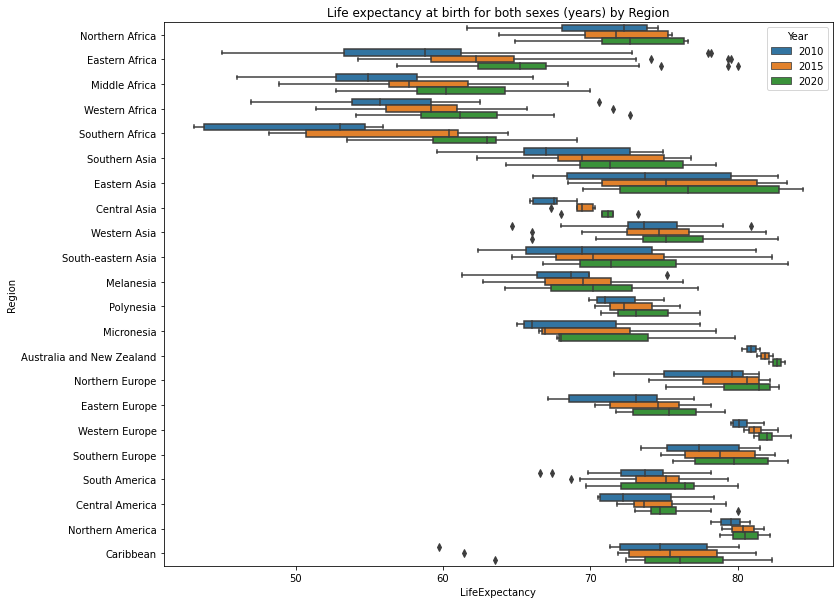

In [13]:
# Figure 5
#
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=df, x='LifeExpectancy', y='Region', hue='Year',order=order_by_region).set_title(
    'Life expectancy at birth for both sexes (years) by Region')
plt.savefig('Figure 5-Life expectancy by Region.jpeg')

#### Observations: Figure 5 like Figure 4 compares life expectancy by Region. Although Figure 4 shows the distribution of data for Melanesia vs. Australia and Northern Africa vs. Southern Africa as being very low for life expectancy, we can see that the mean life expectancy is much higher than the lower end of the data. The distribution is still spread out alot, but this might be due to another attribute (Infant Mortality Rate) that is pulling the data twoards a lower average life expectancy.

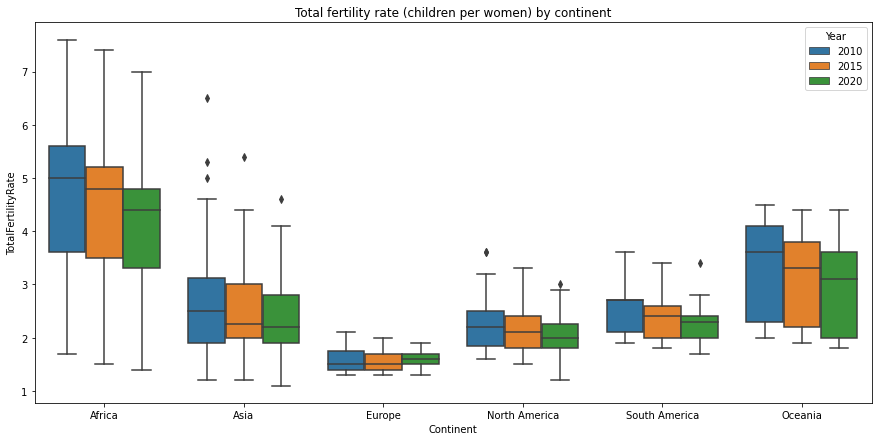

In [14]:
# Figure 6
#
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df, x='Continent', y='TotalFertilityRate', hue='Year',order=order_by_continent).set_title(
    'Total fertility rate (children per women) by continent')
plt.savefig('Figure 6-Total fertility rate (children per women) by continent.jpeg')

#### Observations: Figure 6 is an illustration of total fertility rate by continent. Here we can see that africa has the highest average fertility rate. Even with a deacrease from 5 in 2010 to around 4.5 in 2020 it is still the highest globally. With this many births their population growth should be the highest in the world. The next highest average is in Oceania where it sits at around 3, but here the population is less over all.

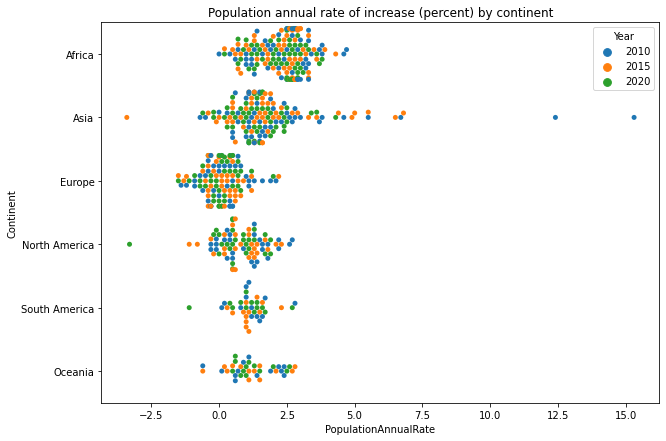

In [15]:
# Figure 7
#
plt.figure(figsize=(10,7))
ax = sns.swarmplot(data=df, x='PopulationAnnualRate', y='Continent', hue='Year',order=order_by_continent).set_title(
    'Population annual rate of increase (percent) by continent')
plt.savefig('Figure 7-Population annual rate of increase (percent) by continent.jpeg')

#### Observations: In the last Figure, Figure 7 we plot Population annual rate of increase (percent) by continent. This figure interestingly shows how much populations growth has chanegd. There are some very intrerenting deacreases in South America and North America. For the most part most countries seem to follow a similar trend with an over all deacreasing population growth. This is good for a multitude of reasons beacuse it shows that world health is improving, people are living longer for a variety of reasons that could include technological advancements, mass vaccination, increased sanitation and more access to food and clean water. It is also promising because it does show that population growth is plateauing slowly, this can aleviate human stresses on our planet that have direct consequences on our planet.

## Summary of Exploratory Data Analysis


The Data displays how quality of life differs among populations. At first glance when analysing the data by continent, there seems to be a homogenity for countries within continents for life expectancy. The data doesnt deviate much for for the majority of the population. Upon separating the continents into regions a pattern emerges. The location of these countries is not the factor that determines a poor or an exemplary performance in any of these metrics. There are countries in Africa that are resource rich, but might be poorer than a resource poor nation. In my initial analysis using GDP data for only 2010 and 2015, there was a correlation between low GDP, high infant mortality rate, and low life expectancy, I did not incliude this data due to lack of data for 2020 leaving many holes. Another interesting attribute was population growth rate. Some places have experienced historically high population growth rates, but the trend seems to show a decreased population growth rate that may be the result of a multitude of underlying factors that are not included in the data. Some of these include technological advancements, mass vaccination, increased sanitation and more access to food and clean water. These are also factors that may have allowed for a global increase in life expectancy. A more indepth look into the underlying factors for this would be neccesary as none of the data used for this analysis include such information. This data was for 201 countries over 3 different years. These trends are bound to change with the post pandemic life. It will be interesting to see by how much these trends may skew given how much has changed in such a short period of time. 